1. Import the libraries and print the information about dataset i.e diabetes.csv
2. Check for datatypes i.e categorical, integer and float in dataset
3. check the columns that have null values
4. Apply the sort on Age column in descending order
5. Print the count values and rows that have "Outcome" == 1 

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
df = pd.read_csv('diabetes.csv')

In [61]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [62]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [63]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [64]:
df.sort_values('Age', ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
459,9,134,74,33,60,25.9,0.460,81,0
453,2,119,0,0,0,19.6,0.832,72,0
666,4,145,82,18,0,32.5,0.235,70,1
123,5,132,80,0,0,26.8,0.186,69,0
684,5,136,82,0,0,0.0,0.640,69,0
...,...,...,...,...,...,...,...,...,...
240,1,91,64,24,0,29.2,0.192,21,0
136,0,100,70,26,50,30.8,0.597,21,0
382,1,109,60,8,182,25.4,0.947,21,0
392,1,131,64,14,415,23.7,0.389,21,0


In [66]:
df.loc[df["Outcome"] == 1].shape[0]

268

In [67]:
from sklearn import linear_model

In [68]:
data = df[['BMI','BloodPressure', 'Age']]
data

,BMI,BloodPressure,Age
0,33.6,72,50
1,26.6,66,31
2,23.3,64,32
3,28.1,66,21
4,43.1,40,33
...,...,...,...
763,32.9,76,63
764,36.8,70,27
765,26.2,72,30
766,30.1,60,47


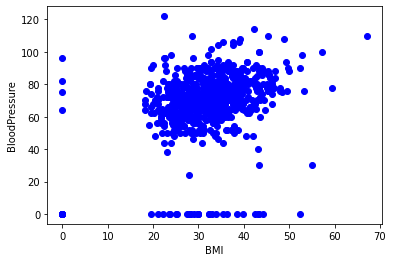

In [69]:
plt.scatter(data['BMI'] , data['BloodPressure'] , color='blue')
plt.xlabel('BMI')
plt.ylabel('BloodPressure')
plt.show()

In [70]:
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

In [71]:
regr = linear_model.LinearRegression()
train_x = np.array(train[['BMI']])
train_y = np.array(train[['BloodPressure']])
regr.fit(train_x,train_y)

LinearRegression()

In [72]:
# The coefficients:
print ('coefficients :' ,regr.coef_) #Slope
print ('Intercept : ',regr.intercept_) #Intercept

coefficients : [[0.67659428]]
Intercept :  [46.94594536]


Text(0, 0.5, 'BloodPressure')

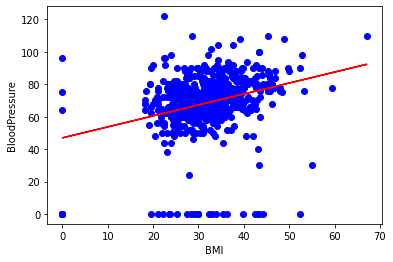

In [73]:
# Plotting the regression line:
plt.scatter(train['BMI'], train['BloodPressure'], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('BMI')
plt.ylabel('BloodPressure')

In [74]:
# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[['BMI']])
test_y = np.array(test[['BloodPressure']])
test_y_ = regr.predict(test_x)
test_y_

array([[71.37099874],
       [64.40207769],
       [66.36420109],
       [60.54549032],
       [66.02590396],
       [68.86759992],
       [72.92716558],
       [63.31952685],
       [74.55099184],
       [76.37779639],
       [67.78504907],
       [72.45354958],
       [63.65782399],
       [68.86759992],
       [70.35610733],
       [63.65782399],
       [65.48462853],
       [70.2884479 ],
       [64.6727154 ],
       [65.55228796],
       [64.46973712],
       [68.05568679],
       [66.43186052],
       [68.3263245 ],
       [74.61865127],
       [60.13953375],
       [66.77015766],
       [70.15312904],
       [66.90547652],
       [65.8905851 ],
       [65.61994739],
       [73.60375985],
       [62.77825143],
       [72.52120901],
       [66.09356338],
       [64.80803426],
       [63.99612113],
       [69.8148319 ],
       [70.01781019],
       [65.07867197],
       [70.08546962],
       [73.13014386],
       [61.69570059],
       [73.26546271],
       [73.33312214],
       [70

In [75]:
print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Mean sum of squares (MSE): %.2f' % np.mean((test_y_ - test_y) ** 2))
print('R2-score: %.2f' % r2_score(test_y_ , test_y) )

Mean absolute error: 12.30
Mean sum of squares (MSE): 304.63
R2-score: -10.84
